## 案例：乳腺癌检测 sklearn
from sklearn.svm import SVC

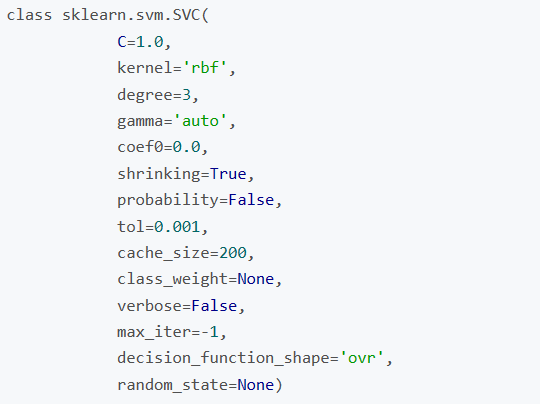  

C : float, optional (default=1.0)

    误差项的惩罚参数，一般取值为10的n次幂，如10的-5次幂，10的-4次幂。。。。10的0次幂，10，1000,1000，在python中可以使用pow（10，n） n=-5~inf
    C越大，相当于惩罚松弛变量，希望松弛变量接近0，即对误分类的惩罚增大，趋向于对训练集全分对的情况，这样会出现训练集测试时准确率很高，但泛化能力弱。
    C值小，对误分类的惩罚减小，容错能力增强，泛化能力较强。

kernel : string, optional (default=’rbf’)

    svc中指定的kernel类型。
    可以是： ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ 或者自己指定。 默认使用‘rbf’ 。

degree : int, optional (default=3)

    当指定kernel为 ‘poly’时，表示选择的多项式的最高次数，默认为三次多项式。
    若指定kernel不是‘poly’,则忽略，即该参数只对‘poly’有作用。

gamma : float, optional (default=’auto’)

    当kernel为‘rbf’, ‘poly’或‘sigmoid’时的kernel系数。
    如果不设置，默认为 ‘auto’ ，此时，kernel系数设置为：1/n_features

coef0 : float, optional (default=0.0)

    kernel函数的常数项。
    只有在 kernel为‘poly’或‘sigmoid’时有效，默认为0。

tol : float, optional (default=1e-3)

    误差项达到指定值时则停止训练，默认为1e-3，即0.001。

In [1]:
__author__ = "fpZRobert"

"""
    支持向量机实战-乳腺癌检测
"""
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn", lineno=196)

from sklearn.datasets import load_breast_cancer

"""
    加载数据
"""
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

print("Shape of X: {0}; positive example: {1}; negative: {2}".format(X.shape, y[y==1].shape[0], y[y==0].shape[0]))  # 查看数据的形状和类别分布

# Out:Shape of X: (569, 30); positive example: 357; negative: 212


Shape of X: (569, 30); positive example: 357; negative: 212


In [2]:
"""
    拆分数据集
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [3]:
"""
    训练模型
"""
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel="rbf", gamma=0.1)	# 使用高斯核函数
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print("train score: {0}; test score: {1}".format(train_score, test_score))

train score: 1.0; test score: 0.6052631578947368


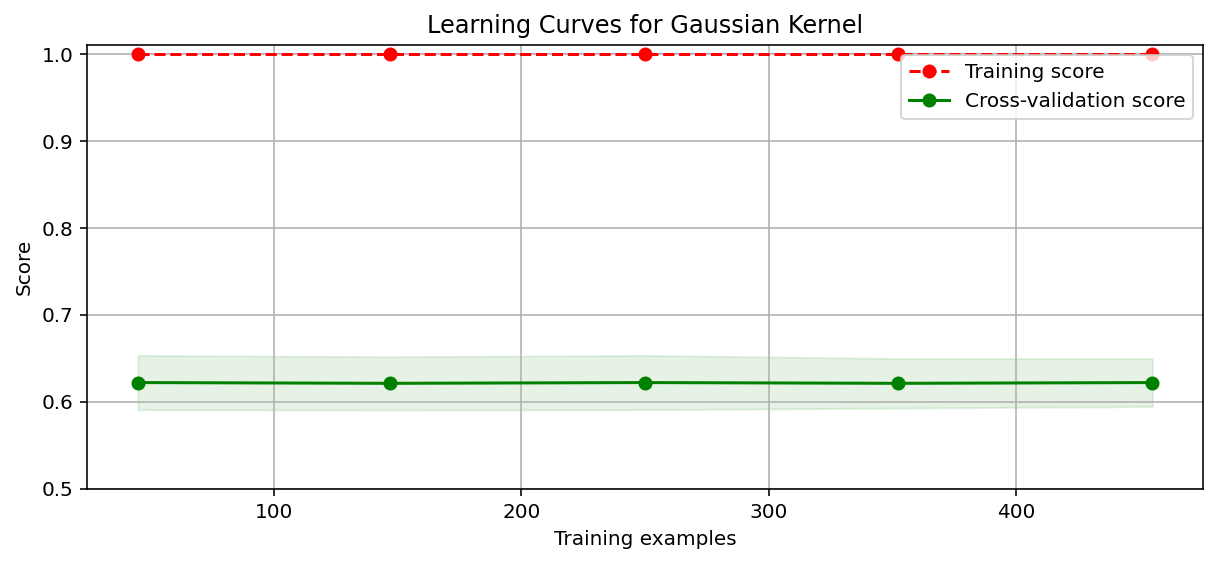

In [4]:
"""
    绘制学习曲线
"""
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

# 绘制学习曲线
def plot_learning_curve(plt, estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = "Learning Curves for Gaussian Kernel"
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, SVC(C=1.0, kernel="rbf", gamma=0.01), title, X, y, ylim=(0.5, 1.01), cv=cv)
plt.show()

In [5]:
"""
    模型调优
"""
from sklearn.model_selection import GridSearchCV
gammas = np.linspace(0, 0.0003, 30)
param_grid = {"gamma": gammas}
clf = GridSearchCV(SVC(), param_grid, cv=5)
clf.fit(X, y)
print(" best param: {0}\n best score: {1}".format(clf.best_params_, clf.best_score_))

 best param: {'gamma': 0.00011379310344827585}
 best score: 0.9367334264865704


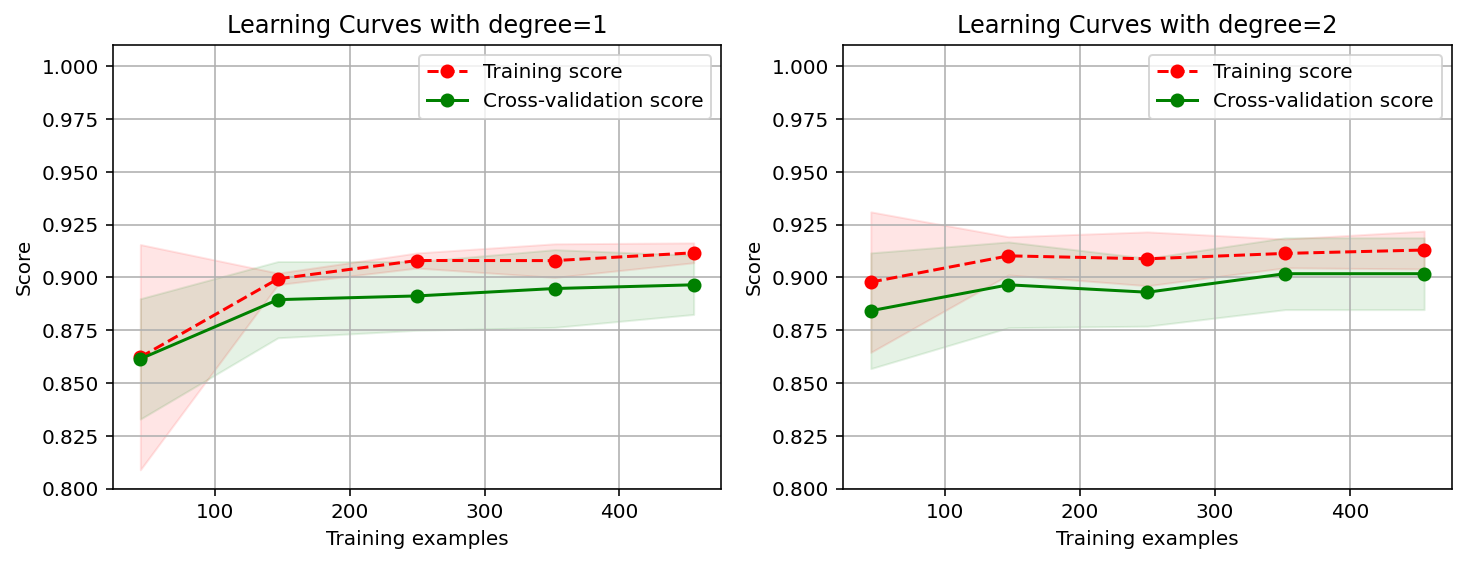

In [6]:
"""
    绘制学习曲线
"""
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = "Learning Curves with degree={0}"
degrees = [1, 2]
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i+1)
    plot_learning_curve(plt, SVC(C=1.0, kernel="poly", degree=degrees[i]), title.format(degrees[i]), X, y, ylim=(0.8, 1.01), cv=cv)
plt.show()

## 作业1：鸢尾花

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4) (150,)
正确率: 31.67%
gamma:0.0,正确率: 28.33%
gamma:0.05555555555555555,正确率: 16.67%
gamma:0.1111111111111111,正确率: 100.00%
gamma:0.16666666666666666,正确率: 100.00%
gamma:0.2222222222222222,正确率: 16.67%
gamma:0.2777777777777778,正确率: 26.67%
gamma:0.3333333333333333,正确率: 100.00%
gamma:0.38888888888888884,正确率: 10.00%
gamma:0.4444444444444444,正确率: 35.00%
gamma:0.5,正确率: 56.67%


C:\Users\Ruiling\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36724 (\N{CJK UNIFIED IDEOGRAPH-8F74}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ruiling\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26354 (\N{CJK UNIFIED IDEOGRAPH-66F2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ruiling\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ruiling\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Ruiling\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning:

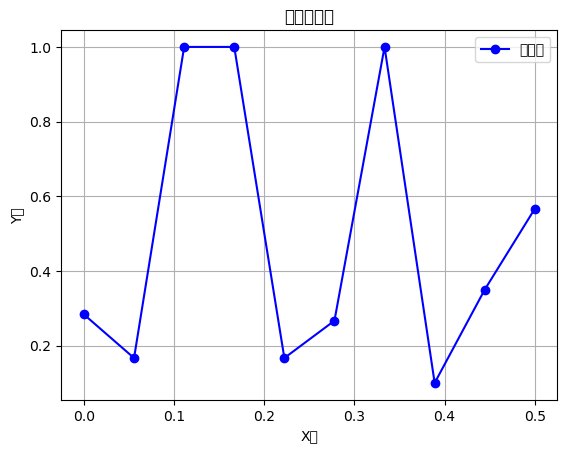

In [7]:
from SVM import SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加载鸢尾花数据集
iris = datasets.load_iris()
print(iris.keys())
X:np.ndarray = iris['data']
y:np.ndarray = iris['target']
print(X.shape, y.shape)
# print(y)
y[y != 0] = -1
y[y == 0] = 1

# 为了方便可视化，只取前两个特征，并且只取两类
# plt.scatter(X[y != 1, 0], X[y != 1, 1], color='red')
# plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
# plt.show()

# 数据预处理，将特征进行标准化，并将数据划分为训练集和测试集
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)#, random_state=40)
# X_train_std = scaler.fit_transform(X_train)
# X_test_std = scaler.fit_transform(X_test)

# 创建SVM对象并训练模型
svm = SVM(X_train, y_train, C=0.1, kernel='linear', tol=0.001, gamma=0.01, max_iter=15)
svm.fit()

# 预测测试集的结果并计算准确率
accuracy = svm.score(X_test, y_test)
print('正确率: {:.2%}'.format(accuracy))


gammas = np.linspace(0, 0.5, 10)
acc = list()
for i in gammas:
    # 创建SVM对象并训练模型
    svm = SVM(X_train, y_train, C=15, kernel='linear', tol=0.001, gamma=0.01, max_iter=15)
    svm.fit()
    # 预测测试集的结果并计算准确率
    accuracy = svm.score(X_test, y_test)
    acc.append(accuracy)
    print('gamma:{},正确率: {:.2%}'.format(i, accuracy))

plt.plot(gammas.tolist(), acc, marker='o', linestyle='-', color='b', label='曲线图')  # 设置标记、线型、颜色和标签
plt.xlabel('X轴')  # 设置X轴标签
plt.ylabel('Y轴')  # 设置Y轴标签
plt.title('曲线图示例')  # 设置标题
plt.legend()  # 显示图例
plt.grid(True)  # 显示网格线
plt.show()

准确率有点奇怪，忽上忽下的